<a href="https://colab.research.google.com/github/SiddheshKapdoskar/SK/blob/master/Copy_of_New_Project_TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

**Loading the dataset**

In [ ]:
train = pd.read_csv('scraper_data.csv')
test = pd.read_csv('test_data.csv')

print(train.shape)
print(test.shape)

(3192, 3)
(3192, 2)


In [ ]:
train.head()

,id,label,tweet
0,1,1,Ayodhya's Ram Mandir Trust to invite #PMModi f...
1,2,1,"#Nepal PM seeks Indian investments in mining, ..."
2,3,1,Mumbai Police probing if drug money with D-lin...
3,4,1,: What a show at Lenglen! \n\nWorld No. 79 Dan...
4,5,2,E-scooters costlier from today \nWatch this an...


In [ ]:
test.head()

,id,tweet
0,3193,#Chandrayaan3 is the succeeding mission to Cha...
1,3194,No Freebie-For-Votes Policy Under Modi Govt: U...
2,3195,Asur Season 2 will see cast members Barun Sobt...
3,3196,#adahsharma Shares She Dehydrated Herself For ...
4,3197,"India, #Nepal Vow To Work Towards Opening More..."


In [ ]:
train.isnull().any()
test.isnull().any()

id       False
tweet     True
dtype: bool

**Displaying data based on label**

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
12,13,0,"In the last few years, #MalayalamCinema has se..."
20,21,0,ONDC CEO Thampi Koshy said democratisation of ...
22,23,0,_IT: . reveals he spent 1st 5 years of his ca...
38,39,0,Fix it from the top…fix it from the bottom: \n...
39,40,0,._author questions the Delhi govt and its mann...
56,57,0,This is a very serious matter; it is a failure...
62,63,0,_IT: #TheKeralaStory is a factually wrong film...
88,89,0,_IT: It's a wrap for Jailer! Rajinikanth and T...
94,95,0,Delhi witnessed its coolest and clearest May i...
98,99,0,To believe that we are done and dusted with th...


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
0,1,1,Ayodhya's Ram Mandir Trust to invite #PMModi f...
1,2,1,"#Nepal PM seeks Indian investments in mining, ..."
2,3,1,Mumbai Police probing if drug money with D-lin...
3,4,1,: What a show at Lenglen! \n\nWorld No. 79 Dan...
5,6,1,. calls ‘The Kerala Story’ a fictional account...
8,9,1,_IT: Why #BhaveshJoshi could not become the su...
9,10,1,Naseeruddin Shah has only expressed his opinio...
13,14,1,Drones are changing how war is being fought in...
16,17,1,"Tweeting about the meeting, said he went to i..."
18,19,1,Assam CM ordered the state's education dept t...


In [ ]:
train[train['label'] == 2].head(10)

,id,label,tweet
4,5,2,E-scooters costlier from today \nWatch this an...
6,7,2,‘The Kerala Story’ showdown gets bigger!\n( | ...
7,8,2,_IT: Raveena Tandon on shooting Tip Tip Barsa ...
10,11,2,Divide deepening or declining? LIVE and Excl...
11,12,2,Why is actor #NaseeruddinShah so upset with th...
14,15,2,Filmmaker-Editor Beena Paul talks about the bi...
15,16,2,. speaks candidly on #Nepotism \n\n#SouthConc...
17,18,2,America's favorite beer Bud Light is getting a...
29,30,2,Why is actor #NaseeruddinShah so upset with th...
36,37,2,"While the world is facing water scarcity, Indi..."


<Axes: >

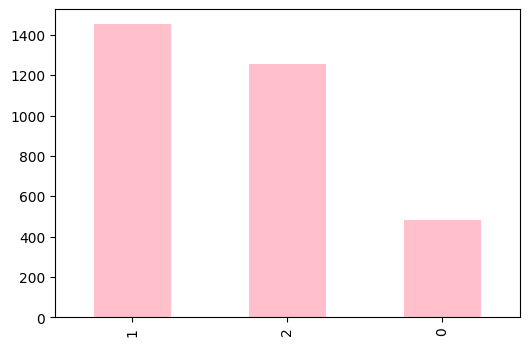

In [ ]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

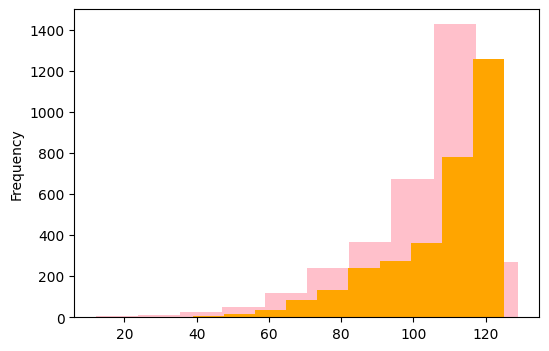

In [ ]:
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,1,Ayodhya's Ram Mandir Trust to invite #PMModi f...,107
1,2,1,"#Nepal PM seeks Indian investments in mining, ...",77
2,3,1,Mumbai Police probing if drug money with D-lin...,86
3,4,1,: What a show at Lenglen! \n\nWorld No. 79 Dan...,126
4,5,2,E-scooters costlier from today \nWatch this an...,91
5,6,1,. calls ‘The Kerala Story’ a fictional account...,90
6,7,2,‘The Kerala Story’ showdown gets bigger!\n( | ...,66
7,8,2,_IT: Raveena Tandon on shooting Tip Tip Barsa ...,110
8,9,1,_IT: Why #BhaveshJoshi could not become the su...,102
9,10,1,Naseeruddin Shah has only expressed his opinio...,93


In [ ]:
train.groupby('label').describe()

id                                                                 \
        count         mean         std   min    25%     50%      75%     max   
label                                                                          
0       481.0  1598.403326  894.421885  13.0  862.0  1517.0  2330.00  3183.0   
1      1454.0  1612.183631  919.796008   1.0  810.5  1638.5  2421.75  3191.0   
2      1257.0  1577.630072  934.205465   5.0  757.0  1579.0  2373.00  3192.0   

          len                                                          
        count        mean        std   min   25%    50%    75%    max  
label                                                                  
0       481.0  106.501040  15.689185  37.0  99.0  113.0  117.0  129.0  
1      1454.0  101.357634  19.314473  13.0  92.0  106.0  117.0  129.0  
2      1257.0  102.914877  17.616986  12.0  93.0  106.0  117.0  129.0

<ipython-input-64-250f85d53a70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)


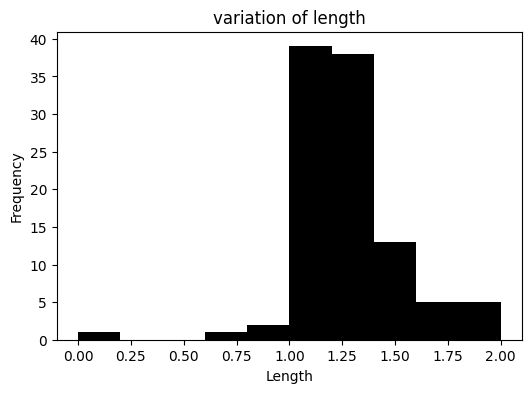

In [ ]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

**Exploratory Data Analysis**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

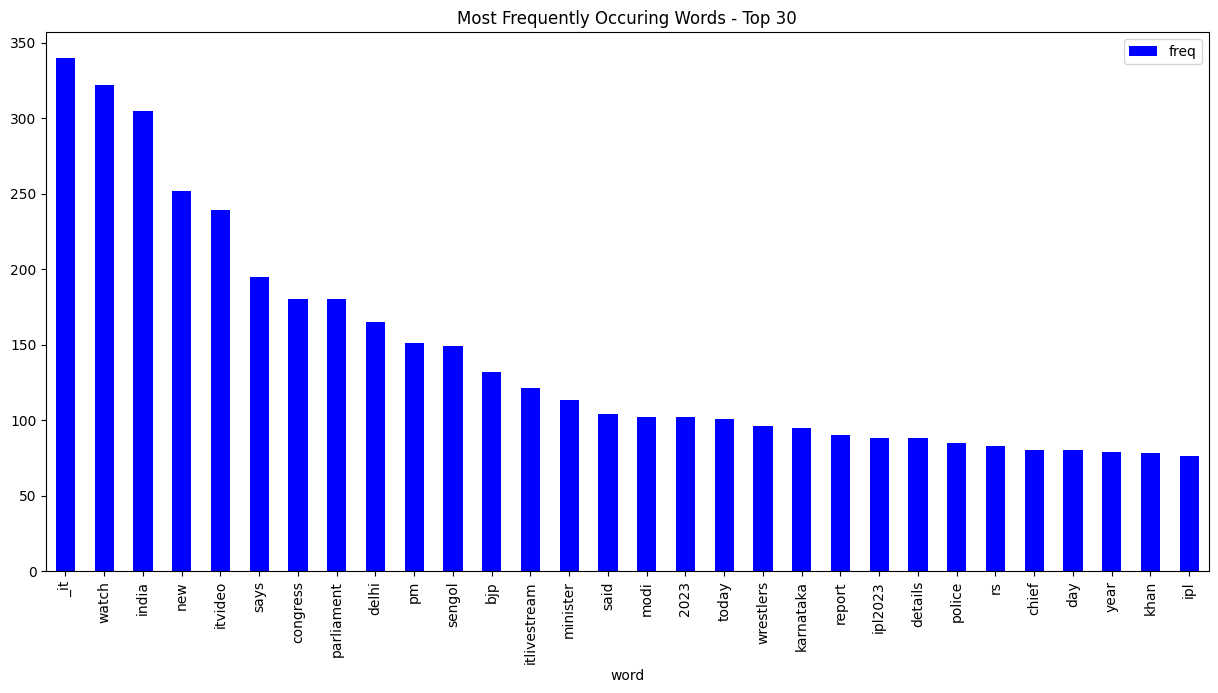

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

**Word Cloud**

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

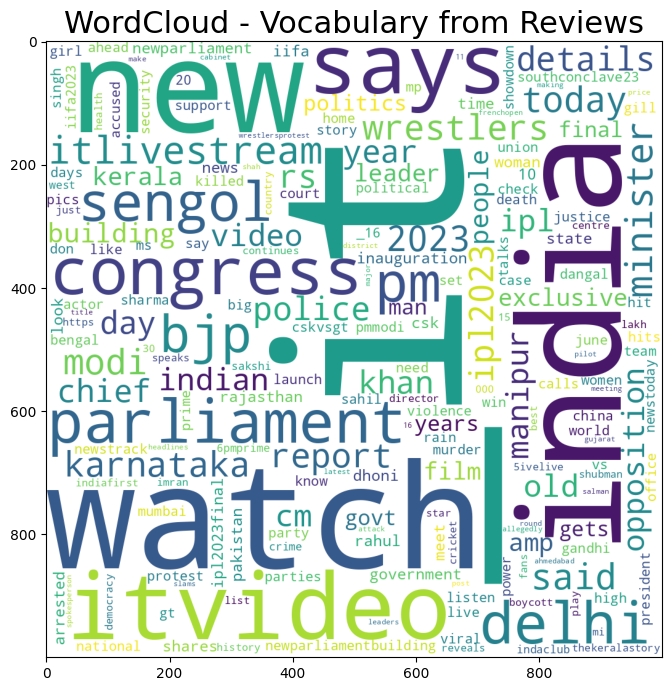

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

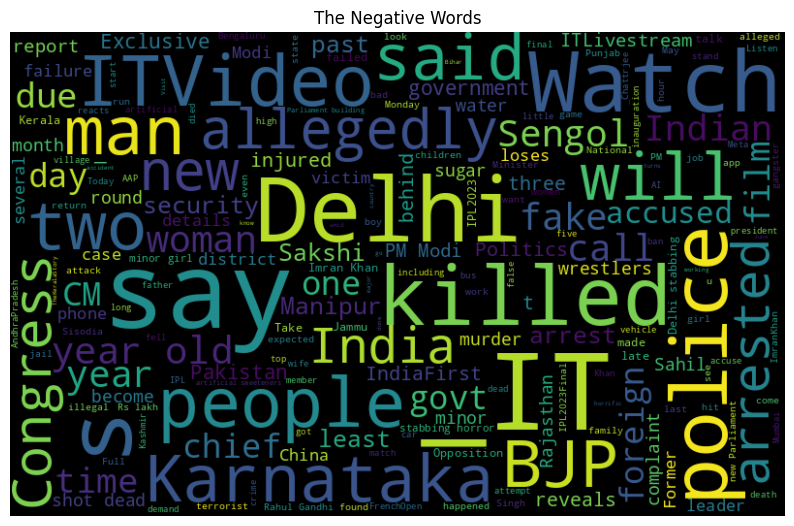

In [ ]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

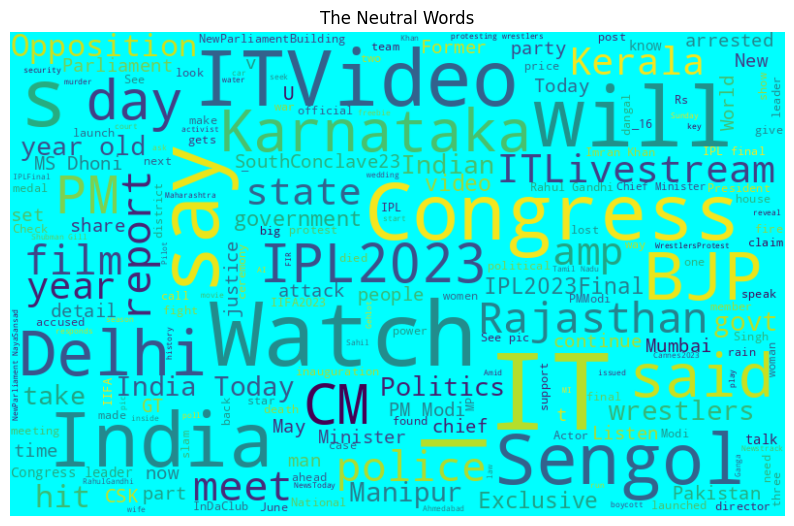

In [ ]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

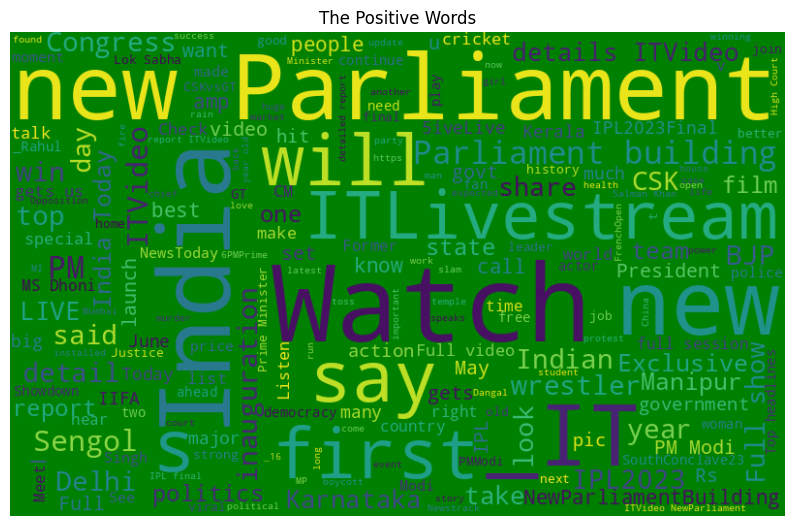

In [ ]:
positive_words =' '.join([text for text in train['tweet'][train['label'] == 2]])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(train['tweet'][train['label'] == 1])

# extracting hashtags from positive tweets
HT_positive = hashtag_extract(train['tweet'][train['label'] == 2])

# unnesting list
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])

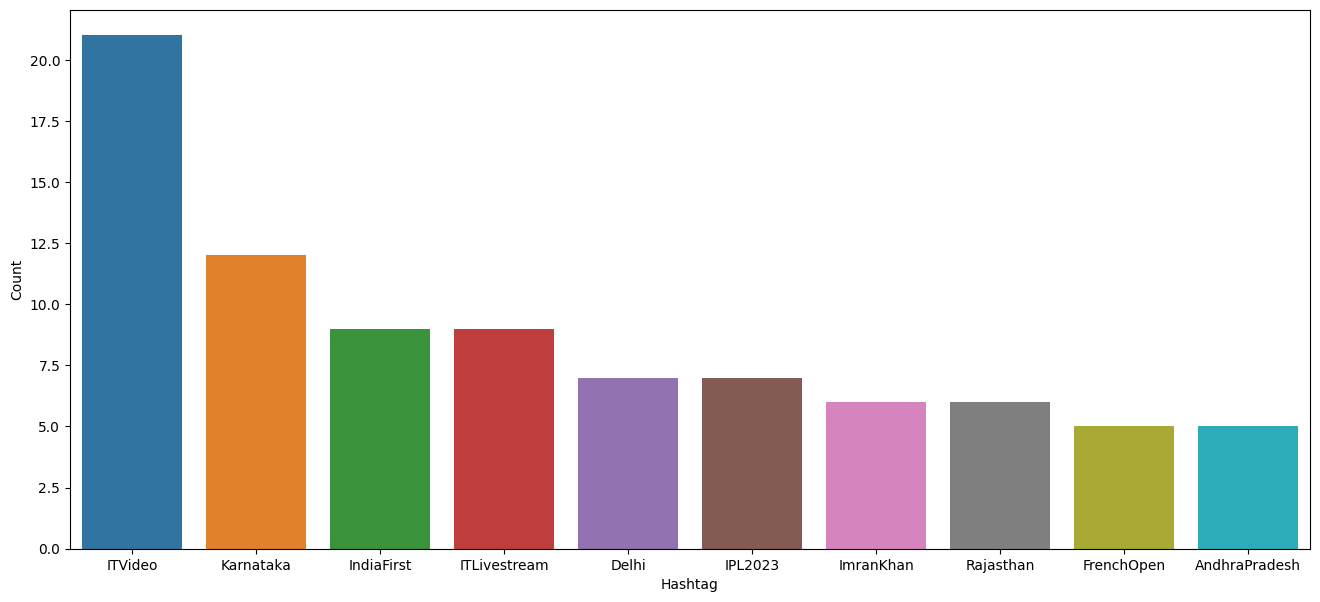

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

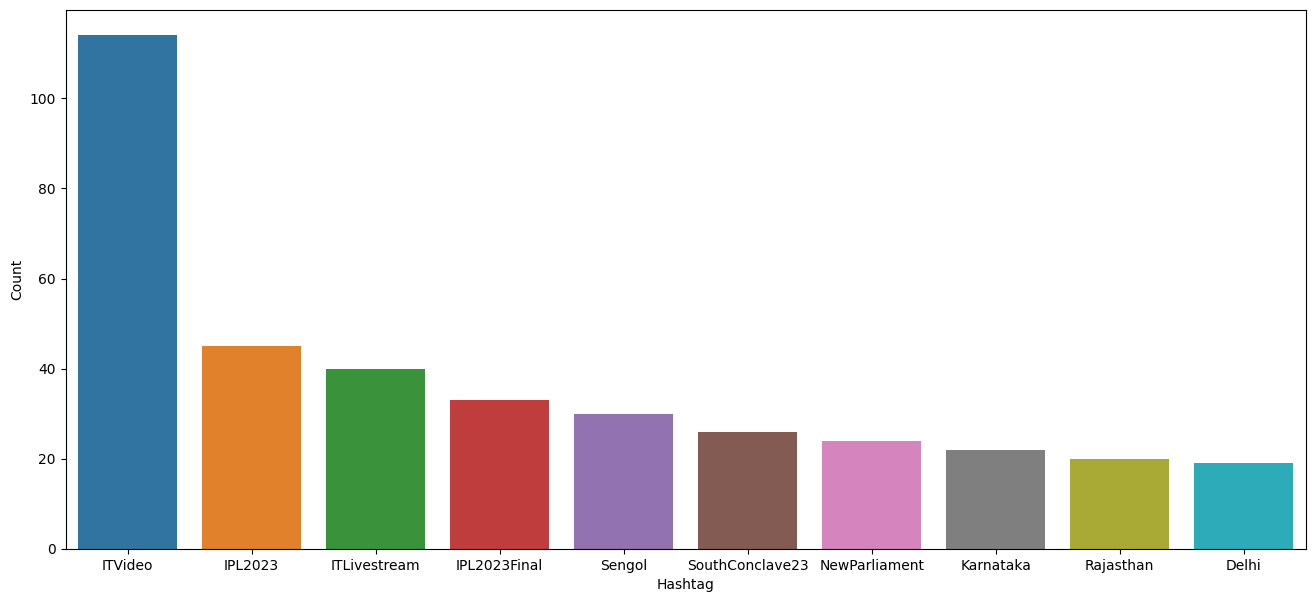

In [ ]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

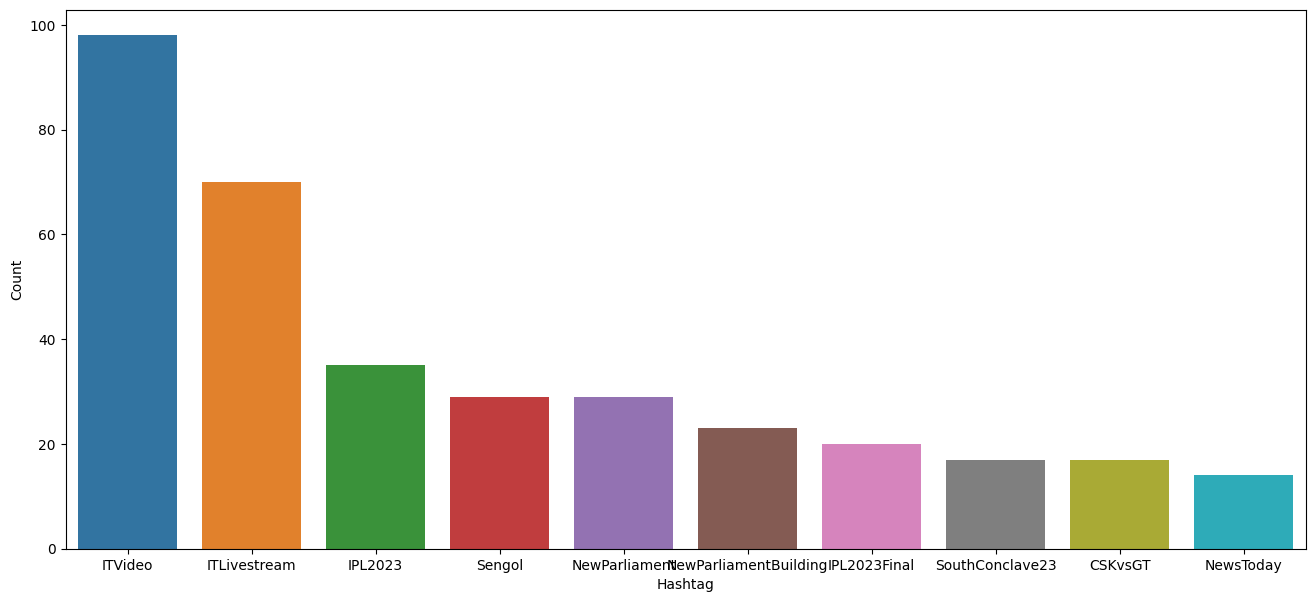

In [ ]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(696044, 1041660)

In [ ]:
model_w2v.wv.most_similar(positive = "successful")

[('greatest', 0.9516211748123169),
 ('century', 0.9443114399909973),
 ('#IP…', 0.944250226020813),
 ('season!', 0.9432690739631653),
 ('captain', 0.9415383338928223),
 ('Ahmedabad!', 0.9268224835395813),
 ('underwent', 0.9258343577384949),
 ('Rayudu', 0.9253517985343933),
 ('2,', 0.9238100647926331),
 ('Ravindra', 0.9237021803855896)]

In [ ]:
model_w2v.wv.most_similar(positive = "win")

[('#GujaratTitans', 0.827883243560791),
 ('Which', 0.8163315057754517),
 ('last-ball', 0.8094143867492676),
 ('record-equalling', 0.8041728138923645),
 ('CSK', 0.7913063168525696),
 ('TOSS!', 0.7860111594200134),
 ('title.', 0.7779795527458191),
 ('Qualifier', 0.7766464352607727),
 ('Final', 0.7748076319694519),
 ('highest-ever', 0.7740023732185364)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

[('#FrenchOpen2023', -0.06207852438092232),
 ('Open', -0.06843104958534241),
 ('#FrenchOpen', -0.07312831282615662),
 ('defeated', -0.07407832145690918),
 ('World', -0.07463032752275467),
 ('French', -0.0843038484454155),
 ('iPhone', -0.1072503924369812),
 ('round', -0.10922189056873322),
 ('htt…', -0.1206841841340065),
 ('drop', -0.1278081238269806)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument


def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=["Ayodhya's", 'Ram', 'Mandir', 'Trust', 'to', 'invite', '#PMModi', 'for', 'installation', 'of', 'idol', 'in', 'temple', 'Shilpi', 'Sen', '#UttarPradesh'], tags=['tweet_0']),
 TaggedDocument(words=['#Nepal', 'PM', 'seeks', 'Indian', 'investments', 'in', 'mining,', 'agri,', 'energy,', 'hospitality,', 'IT'], tags=['tweet_1']),
 TaggedDocument(words=['Mumbai', 'Police', 'probing', 'if', 'drug', 'money', 'with', 'D-link', 'invested', 'in', 'private', 'firms', '#Mumbai'], tags=['tweet_2']),
 TaggedDocument(words=[':', 'What', 'a', 'show', 'at', 'Lenglen!', 'World', 'No.', '79', 'Daniel', 'Altmaier', 'defeated', 'No.', '8', 'seed', 'Jannik', 'Sinner', 'in', 'a', '5-set', 'marathon', 'that', 'stretched…'], tags=['tweet_3']),
 TaggedDocument(words=['E-scooters', 'costlier', 'from', 'today', 'Watch', 'this', 'and', 'more', 'on', '#BusinessToday', 'with', '#ITLivesteam'], tags=['tweet_4']),
 TaggedDocument(words=['.', 'calls', '‘The', 'Kerala', 'Story’', 'a', 'fictional', 'a

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 3192):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 3192):
  review = re.sub('[^a-zA-Z]', ' ', str(test['tweet'][i]))
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

**Input Split**

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(3192, 2500)
(3192,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(3192, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(2394, 2500)
(798, 2500)
(2394,)
(798,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.7568922305764411
F1 score : 0.7568922305764411
[[ 42  51  24]
 [  8 334  24]
 [  8  79 228]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=40000)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6403508771929824
f1 score : 0.6403508771929824
[[ 54  38  25]
 [ 25 252  89]
 [ 30  80 205]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.7305764411027569
f1 score : 0.7305764411027568
[[ 65  24  28]
 [ 38 280  48]
 [ 19  58 238]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9452798663324979
Validation Accuracy : 0.5989974937343359
f1 score : 0.5989974937343359
[[  5  84  28]
 [  0 320  46]
 [  1 161 153]]


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.8680033416875522
Validation Accuracy : 0.7406015037593985
f1 score : 0.7406015037593985
[[ 45  52  20]
 [ 10 338  18]
 [ 10  97 208]]
